In [ ]:
# EDA
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from pingouin import ttest

# ML
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_curve, auc, log_loss, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Otimizacao de Hiperparametros
import optuna


### Carregar os Dados

In [ ]:
# Carregar dados para o dataframe
df_frutas = pd.read_csv('datasets/fruit_quality.csv')

In [ ]:
# Visualizar Dataframe
df_frutas.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,good
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad


In [ ]:
df_frutas.tail(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3990,3990,-1.396794,-0.599596,-1.931104,1.815668,1.670732,1.614027,-0.987968,bad
3991,3991,-4.007762,2.970164,0.218167,-0.492369,1.656375,-2.133895,-4.431321,good
3992,3992,1.764253,-2.079695,-0.083383,-0.086724,-1.703385,3.840101,-0.338261,good
3993,3993,1.520142,-0.352623,-3.206467,1.341719,0.675568,0.107093,-0.945080,bad
3994,3994,1.482508,-2.581181,-0.306888,1.527877,1.056361,2.560829,-1.229255,good
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good
3999,3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796,good


In [ ]:
# Estrutuura do Dataframe
df_frutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


## EDA

In [ ]:
# Como está a distribuição da variálve target - Percentual
px.bar(df_frutas.value_counts('Quality') / len(df_frutas))

In [ ]:
# Transformação da variável Quality para numérica
df_frutas['Quality'] = (df_frutas['Quality'] == 'good').astype(int)

In [55]:
df_frutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 281.4 KB


In [56]:
df_frutas.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,0
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,1
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,1
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,0
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,0


In [57]:
# Remover a coluna A_id, pois não tem poder preditivo
df_frutas.drop(columns=['A_id'], inplace=True)

In [58]:
df_frutas.head(10)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,0
6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,1
7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,1
8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,0
9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,0


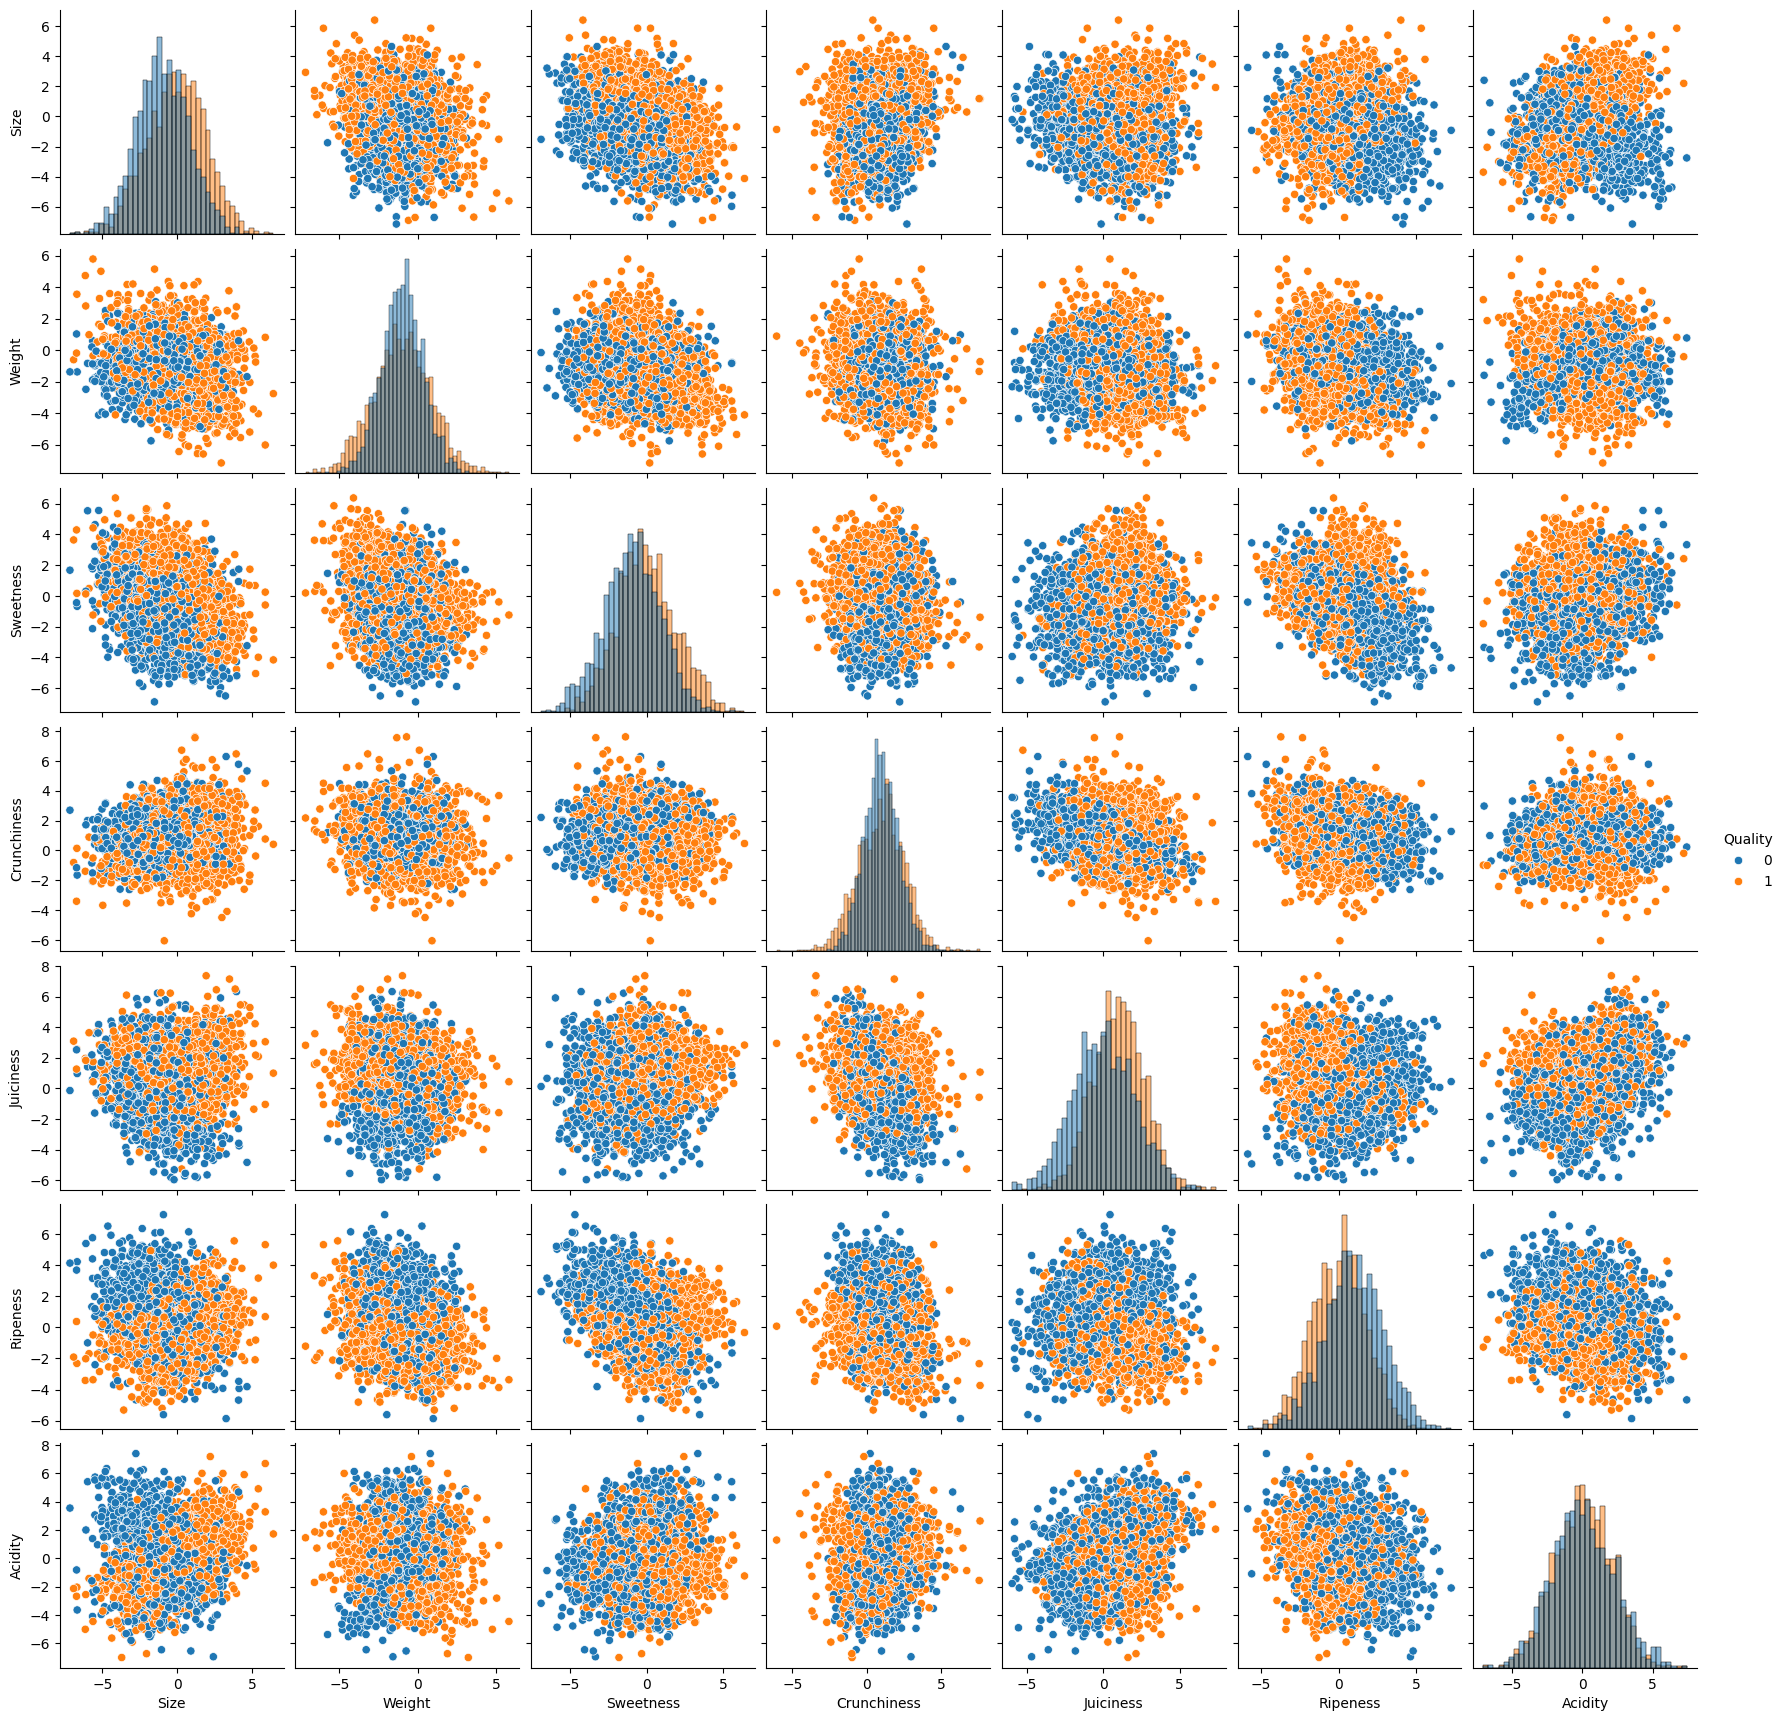

In [74]:
# Verifificar distribuição e as correlações entre as variáveis
sns.pairplot(df_frutas, hue='Quality', diag_kind='hist')

In [77]:
# Boxplot Quality x Weight
px.box(df_frutas, x='Quality', y='Weight', color='Quality', title='Boxplot Quality x Weight')

/home/vitor-linux/.local/share/virtualenvs/ia-para-produtos-regressao-logistica-ZGuaC-dK/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [78]:
# Boxplot Quality x Sweetness
px.box(df_frutas, x='Quality', y='Sweetness', color='Quality', title='Boxplot Quality x Sweetness')

/home/vitor-linux/.local/share/virtualenvs/ia-para-produtos-regressao-logistica-ZGuaC-dK/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [79]:
# Boxplot Quality x Weight
px.box(df_frutas, x='Quality', y='Weight', color='Quality', title='Boxplot Quality x Sweetness')

/home/vitor-linux/.local/share/virtualenvs/ia-para-produtos-regressao-logistica-ZGuaC-dK/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [80]:
# Boxplot Quality x Size
px.box(df_frutas, x='Quality', y='Size', color='Quality', title='Boxplot Quality x Size')

/home/vitor-linux/.local/share/virtualenvs/ia-para-produtos-regressao-logistica-ZGuaC-dK/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

